# ECSE415 - Intro to Computer Vision
## Assignment 4

In [8]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
import os
import csv

In [7]:
from google.colab import drive
from google.colab import files 
drive.mount("/content/drive", force_remount=True)

# path = './'  # Uncomment in-case you are running this locally
path = '/content/drive/My Drive/ECSE415/Project/'
frames_path = path + 'frames/'

Mounted at /content/drive


## 1 Existing Person Detection Technique: YOLOv3

In [20]:
# thresholds for detection
confidence_thresh = 0.5
score_thresh = 0.5
iou_thresh = 0.5
print_thresh = 11

# the yolov3 neural network configuration
config_path = path + 'yolov3.cfg'
# the yolov3 net weights file
weights_path = path + 'yolov3.weights'

# load the yolov3 network
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

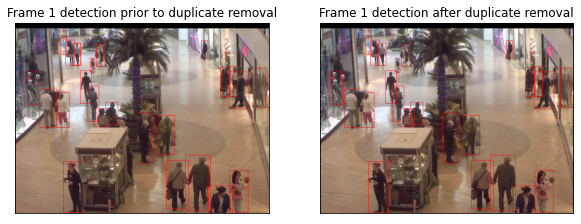

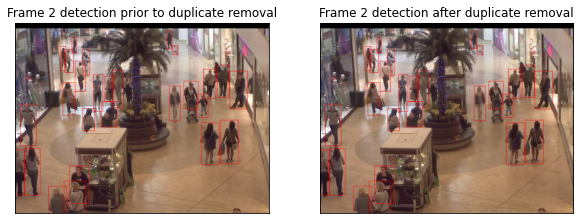

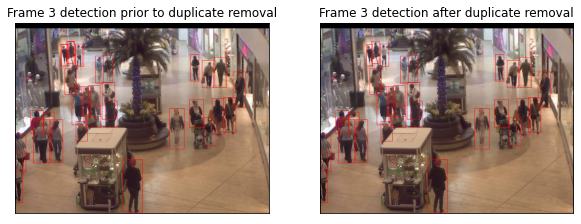

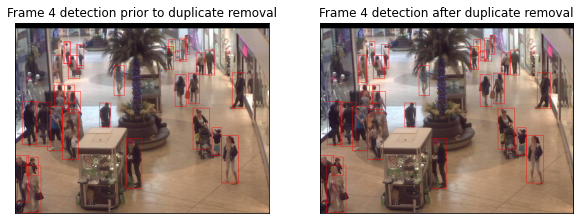

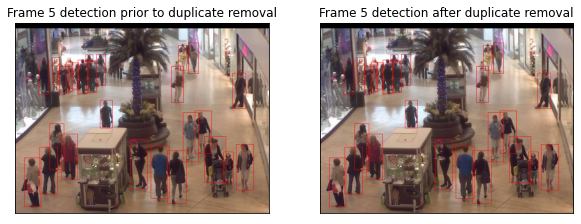

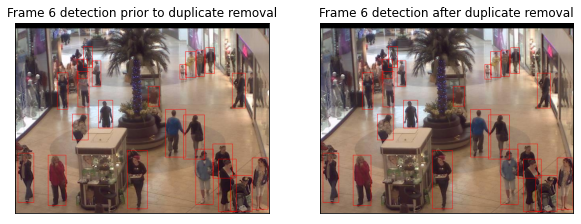

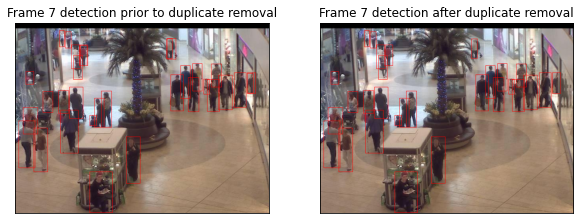

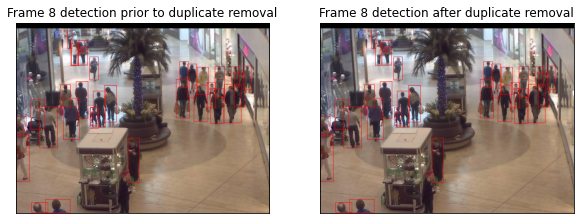

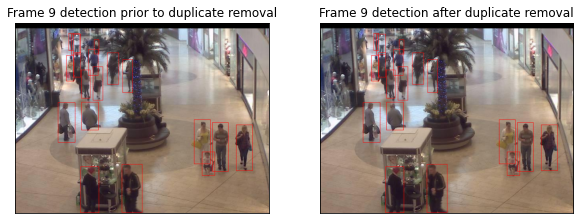

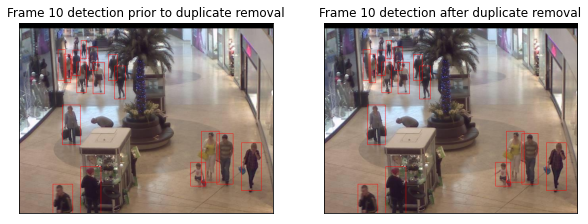

100th frame
200th frame
300th frame
400th frame
500th frame
600th frame
700th frame
800th frame
900th frame
1000th frame
1100th frame
1200th frame
1300th frame
1400th frame
1500th frame
1600th frame
1700th frame
1800th frame
1900th frame
2000th frame


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
preds = []

# Iterate over frame images
for i in range(1,2001):

    # Get filepath
    filepath = frames_path + 'seq_' + '0'*(6-len(str(i))) + str(i) + '.jpg'

    # Read image
    image = cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB)
    # Read image shape
    h, w = image.shape[:2]
    # Create 4D blobs with pixel intensity between 0 and 1
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (w, h))

    # Sets the blob as the input of the network
    net.setInput(blob)

    # Get all the layer names
    ln = net.getLayerNames()
    ln = [ln[j[0] - 1] for j in net.getUnconnectedOutLayers()]

    # Feed forward (inference) and get the network output
    layer_outputs = net.forward(ln)

    # Parameters for drawing and storing boxes
    font_scale = 1
    thickness = 1
    boxes, confidences = [], []

    # Iterate over detected objects
    for output in layer_outputs:
        for detection in output:

            # Look at top 5 detected objects
            scores = detection[5:]
            # Get class with max score
            confidence = np.max(scores)
            class_id = np.argmax(scores)

            # Filter out weak detections
            if confidence > confidence_thresh and class_id == 0:

                # Compute detection box location
                box = detection[:4] * np.array([w, h, w, h])
                (centerX, centerY, width, height) = box.astype("int")
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))

    # Display first print_thresh images with boxes
    if (i < print_thresh):

        output_img = image.copy()

        # Iterate over detected persons
        for idx in range(len(boxes)):
            # Draw detection box
            x, y = boxes[idx][0], boxes[idx][1]
            w, h = boxes[idx][2], boxes[idx][3]
            cv2.rectangle(output_img, (x, y), (x + w, y + h), color=(255,0,0), thickness=thickness)

        # Output resulting image
        plt.figure(figsize=(10,5))
        plt.subplot(121)
        plt.imshow(output_img)
        plt.title('Frame ' + str(i) + " detection prior to duplicate removal"), plt.xticks([]), plt.yticks([])

    # perform the non maximum suppression to remove duplicate detections
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, score_thresh, iou_thresh)

    # Display first print_thresh images with corrected boxes
    if (i < print_thresh):

        final_img = image.copy()

        # Ensure at least one detection exists
        if len(idxs) > 0:
            # Iterate over corrected detected persons
            for idx in idxs.flatten():
                # Draw detection box
                x, y = boxes[idx][0], boxes[idx][1]
                w, h = boxes[idx][2], boxes[idx][3]
                cv2.rectangle(final_img, (x, y), (x + w, y + h), color=(255,0,0), thickness=thickness)

        # Output resulting image
        plt.subplot(122)
        plt.imshow(final_img)
        plt.title('Frame ' + str(i) + " detection after duplicate removal"), plt.xticks([]), plt.yticks([])
        plt.show()

    # Store id and number of detected persons
    preds.append([i, len(idxs)])

    if (i % 100 == 0): print(str(i)+'th frame')

# Write results in csv file
with open('yolov3_results.csv', 'w') as fp:
    writer = csv.writer(fp)
    writer.writerow(['id', 'count'])
    writer.writerows(preds)
files.download('yolo_results.csv')